# Tarea4 Olmo Guerrero Medina



In [1]:
# Required libraries
import matplotlib.pyplot as plt
%matplotlib
from netCDF4 import Dataset
from mpl_toolkits.basemap import Basemap # Import the Basemap toolkit
import numpy as np # Import the Numpy package
from cpt_convert import loadCPT # Import the CPT convert function
from matplotlib.colors import LinearSegmentedColormap # Linear interpolation for color maps
from datetime import datetime
from pyproj import Proj

# Converts the CPT file to be used in Python
cpt = loadCPT('IR4AVHRR6.cpt')
# Makes a linear interpolation with the CPT file
cpt_convert = LinearSegmentedColormap('cpt', cpt)

Using matplotlib backend: TkAgg


## NOTA:

En linux existe un problema con la libreria Basemap, al importarla muestra KeyError 'PROJ_LIB', esto se debe a que el codigo que inicializa basemap tiene incorrecta la direccion de la libreria projlib. Para solucionar esto, se puede modificar el archivo "_init_.py" ubicado en "/anaconda/lib/python2.7/site-packages/mpl_toolkits/basemap". Hay que modificar la linea donde se define el directorio de pyproj (pyproj_datadir = ), hay que hacer que apunte al directorio de este pograma, por ejemplo :
    pyproj_datadir = '/home/usrname/anaconda2/share/proj/'

## 1) bajar un archivo y hacer una imagen

La imagen por utilizar es del GOES16 del día 10 de octubre de 2018, canal02, 12:02
Conus

In [2]:
# Path to the GOES-R file
path = '/home/olmo/Documents/Percepcion Remota/python clase/sat0/OR_ABI-L2-CMIPC-M3C02_G16_s20182831202203_e20182831204576_c20182831205088.nc'

# Search for the Scan Start in the file name
Start = (path[path.find("_s")+2:path.find("_e")-1])
End = (path[path.find("_e")+2:path.find("_c")-1])

# Format the "Observation Start" string
datetime_start = datetime.strptime(Start,'%Y%j%H%M%S')
datetime_end = datetime.strptime(End,'%Y%j%H%M%S')
print datetime_start

2018-10-10 12:02:20


In [3]:
# Open the file using the NetCDF4 library
nc = Dataset(path)
 
# Extract the Brightness Temperature values from the NetCDF
#data = nc.variables['CMI'][:]-273.15
#print nc.variables
data = nc.variables['CMI'][:]

ori_proj = nc.variables['goes_imager_projection']
# Satellite height
sat_h = ori_proj.perspective_point_height
# Satellite longitude
sat_lon = ori_proj.longitude_of_projection_origin
# Satellite sweep
sat_sweep = ori_proj.sweep_angle_axis

# The projection x and y coordinates equals
# the scanning angle (in radians) multiplied by the satellite height (http://proj4.org/projections/geos.html)
X = nc.variables['x'][:] * sat_h
Y = nc.variables['y'][:] * sat_h

p = Proj(proj='geos', h=sat_h, lon_0=sat_lon, sweep=sat_sweep)
# Convert map points to latitude and longitude with the magic provided by Pyproj
XX, YY = np.meshgrid(X, Y)
lons, lats = p(XX, YY, inverse=True)



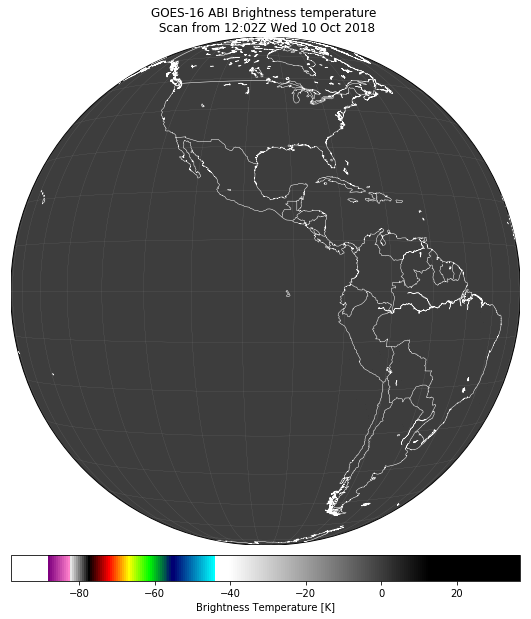

In [47]:
#
# Normal plot with original projection
#
# plt.figure(figsize=(10,10))
bmap = Basemap(projection='geos', lon_0=-95.5, lat_0=0.0, satellite_height=35786023.0, ellps='GRS80', resolution='l')

# Plot GOES-16 Channel using 170 and 378 as the temperature thresholds
bmap.imshow(data, origin='upper', vmin=175-273.15, vmax=310-273.15, cmap=cpt_convert)
 
# Draw the coastlines, countries, parallels and meridians
bmap.drawcoastlines(linewidth=0.5, linestyle='solid', color='white')
bmap.drawcountries(linewidth=0.5, linestyle='solid', color='white')
bmap.drawparallels(np.arange(-90.0, 90.0, 10.0), linewidth=0.1, color='white')
bmap.drawmeridians(np.arange(0.0, 360.0, 10.0), linewidth=0.1, color='white')
 
# Insert the legend
bmap.colorbar(location='bottom', label='Brightness Temperature [K]')

date_formatted = datetime.strftime(datetime_start,'%H:%MZ %a %d %b %Y')
plt.title("GOES-16 ABI Brightness temperature \n Scan from " +date_formatted)

#Export result
# DPI = 300
# plt.savefig('GOES-16_Ch13.png', dpi=DPI, bbox_inches='tight', pad_inches=0)
 
# Show the plot
plt.rcParams['figure.figsize'] = (10,10)
plt.show()

## 2) rehacer la imagen de cuba "zoom" , pero para otra región

En este caso la región corresponde al huracán Michael (10-oct-2018)

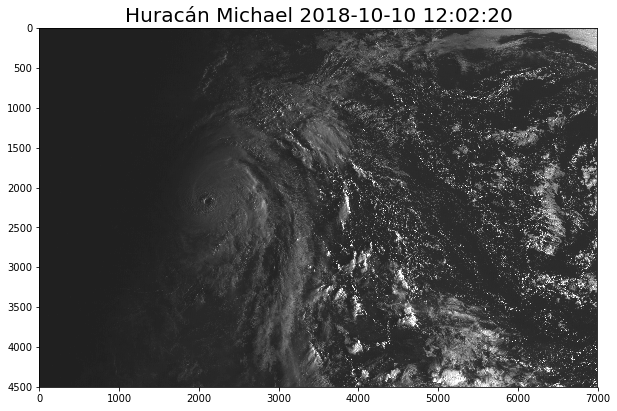

In [48]:
data_subset=data[1000:5500,3000:-1]
plt.figure(figsize=(10,10))
plt.title(u'Huracán Michael ' +str(datetime_start), fontsize=20)
plt.imshow(data_subset,vmin=-0.05, vmax=0.35, cmap="gist_gray")

## 3) hacer una mejor imagen en falso color

/home/olmo/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in sqrt
/home/olmo/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in sqrt
/home/olmo/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in sqrt


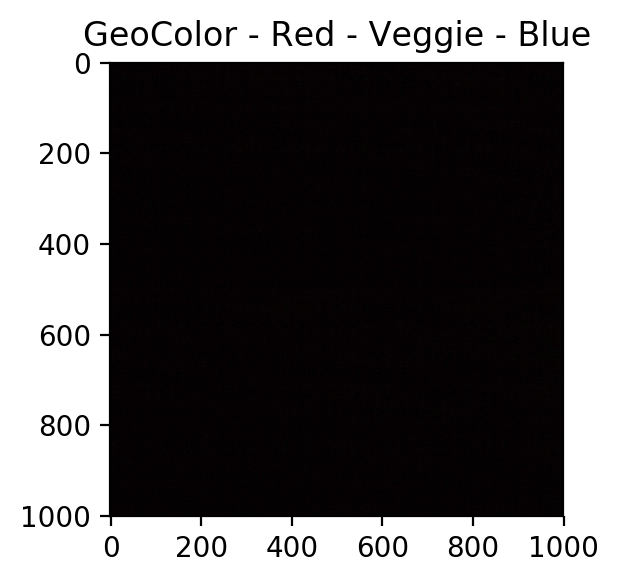

In [49]:
# Load Channel 1
g16nc = Dataset('/home/olmo/Documents/Percepcion Remota/python clase/sat0/OR_ABI-L1b-RadM1-M3C02_G16_s20182831102582_e20182831103039_c20182831103073.nc', 'r')
radiance = g16nc.variables['Rad'][:]
g16nc.close()
g16nc = None

# Load Channel 2
g16nc = Dataset('/home/olmo/Documents/Percepcion Remota/python clase/sat0/OR_ABI-L1b-RadM1-M3C01_G16_s20182831102582_e20182831103039_c20182831103083.nc', 'r')
radiance_1 = g16nc.variables['Rad'][:]
g16nc.close()
g16nc = None

# Load Channel 3 
g16nc = Dataset('/home/olmo/Documents/Percepcion Remota/python clase/sat0/OR_ABI-L1b-RadM1-M3C03_G16_s20182831102582_e20182831103039_c20182831103082.nc', 'r')
radiance_3 = g16nc.variables['Rad'][:]
g16nc.close()
g16nc = None

Esun_Ch_01 = 726.721072
Esun_Ch_02 = 663.274497
Esun_Ch_03 = 441.868715
d2 = 0.3

ref = (radiance * np.pi * d2) / Esun_Ch_02

ref_1 = (radiance_1 * np.pi * d2) / Esun_Ch_01
# Make sure all data is in the valid data range
ref_1 = np.maximum(ref_1, 0.0)
ref_1 = np.minimum(ref_1, 1.0)
ref_gamma_1 = np.sqrt(ref_1)


ref_3 = (radiance_3 * np.pi * d2) / Esun_Ch_03
# Make sure all data is in the valid data range
ref_3 = np.maximum(ref_3, 0.0)
ref_3 = np.minimum(ref_3, 1.0)
ref_gamma_3 = np.sqrt(ref_3)

def rebin(a, shape):
    sh = shape[0],a.shape[0]//shape[0],shape[1],a.shape[1]//shape[1]
    return a.reshape(sh).mean(-1).mean(1)

ref_gamma = np.sqrt(ref)

ref_gamma_2 = rebin(ref_gamma, [1000, 1000])

geocolor = np.stack([ref_gamma_2, ref_gamma_3, ref_gamma_1], axis=2)
fig = plt.figure(figsize=(3,3),dpi=200)
im = plt.imshow(geocolor)
plt.title('GeoColor - Red - Veggie - Blue')
plt.show()